# Admin

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [31]:
def residual(theoretical, observed):
    return theoretical - observed

def normalised_residual(theoretical, observed, error):
    return  (theoretical - observed) / error

def chi_squared(model_params, model, x_data, y_data, y_error):
    return(np.sum(((y_data - model(x_data, *model_params))/y_error)**2))

def reduced_chi_squared(Chi_squared, DoF):
    return Chi_squared / (DoF - 1)

In [32]:
file_name = "Trial_Datasheet.xlsx"
independent_variable_name = "variable_1"
dependent_variable_name = "variable_2"
independent_variable_uncertainty_name = "uncertainty_1"
dependent_variable_uncertainty_name = "uncertainty_2"

df = pd.read_excel(file_name)

In [33]:
def model(x, A,B):
    return A*x**B

p0_model = [1.1, 0.5]

In [34]:
x_data = df[independent_variable_name]
y_data = df[dependent_variable_name]

x_error = df[independent_variable_uncertainty_name]
y_error = df[dependent_variable_uncertainty_name]

# Workflow

In [60]:
popt_model, cov_model = curve_fit(model,
                                  x_data,
                                  y_data,
                                  sigma = y_error,
                                  p0 = p0_model,
                                  absolute_sigma = True) #if the error is accurate set to True, if guess set False

model_uncertainties = np.sqrt(np.diag(cov_model))
chi2 = chi_squared(popt_model, model, x_data, y_data, y_error)
Rchi2 = reduced_chi_squared(chi2, len(p0_model))

res = residual(model(x_data, *popt_model), y_data)
norm_res = normalised_residual(model(x_data, *popt_model), y_data, y_error)

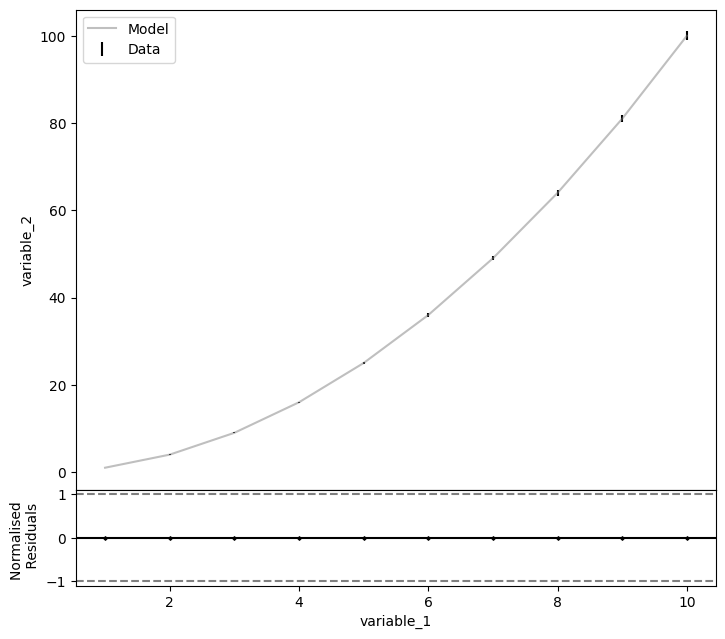

----- Fit Results -----
fit variable 1 = 1.00000±0.00756
fit variable 2 = 2.00000±0.00455
----- Data Analysis -----
Chi^2 = 0.00000
Reduced Chi^2 = 0.00000
----- ----- ----- -----


In [89]:
fig = plt.figure(1)

main = fig.add_axes([0,0,1,1])
main.errorbar(x_data, y_data, yerr = y_error, fmt='none', linestyle='None', color = 'black', label = 'Data')
main.plot(x_data, model(x_data, *popt_model), label = "Model", color = 'grey', alpha = 0.5)


plt.ylabel(dependent_variable_name)
main.legend()

resplt = fig.add_axes([0,-0.2,1,0.2])
resplt.axhline(0, color='black')
resplt.axhline(1, color='grey', linestyle = '--')
resplt.axhline(-1, color='grey', linestyle = '--')

resplt.scatter(x_data, norm_res, marker = 'D', color = 'black', s = 3)

plt.xlabel(independent_variable_name)
plt.ylabel("Normalised \n Residuals")
plt.show()

print(f"----- Fit Results -----")
for i in range(len(popt_model)):
    print(f"fit variable {i+1} = {popt_model[i]:.5f}±{model_uncertainties[i]:.5f}")

print(f"----- Data Analysis -----")
print(f"Chi^2 = {chi2:.5f}")
print(f"Reduced Chi^2 = {Rchi2:.5f}")
print(f"----- ----- ----- -----")